# Visualize Results of Matching Runs from IND Runs with extra processing 2
including the combined predicates of 1 and 4

## Import in data from runs

In [92]:
import pandas as pd

In [93]:
data_df = pd.read_csv('ind_match_runs_12_12.csv')

In [94]:
data_df['settings_file'].unique()

array(['dedupe_extension/settings_IND_4',
       'dedupe_extension/settings_IND_0',
       'dedupe_extension/settings_IND_1',
       'dedupe_extension/settings_IND_2',
       'dedupe_extension/settings_IND_3',
       'dedupe_extension/settings/settings_IND_0',
       'dedupe_extension/settings/settings_IND_1',
       'dedupe_extension/settings/settings_IND_2',
       'dedupe_extension/settings/settings_IND_3',
       'dedupe_extension/settings/settings_IND_4',
       'dedupe_extension/settings/settings_IND_1_comb'], dtype=object)

In [95]:
data_df.shape

(56, 14)

In [96]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [116]:
files = [['dedupe_extension/settings_IND_0','settings_IND_0 orig',0],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig',0],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig',0],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig',0],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig', 0],
         ['dedupe_extension/settings/settings_IND_4','settings_IND_4 extra',1],
         ['dedupe_extension/settings/settings_IND_3','settings_IND_3 extra',1],
         ['dedupe_extension/settings/settings_IND_2','settings_IND_2 extra',1],
         ['dedupe_extension/settings/settings_IND_1','settings_IND_1 extra',1],
         ['dedupe_extension/settings/settings_IND_0','settings_IND_0 extra',1],
         ['dedupe_extension/settings/settings_IND_1_comb', 'settings_IND_1_comb extra',1]]

In [99]:
start = 0.0
stop = 1.0
number_of_lines= len(6)
cm_subsection = linspace(start, stop, number_of_lines) 
purples = [ cm.Purples(x) for x in cm_subsection ]
reds = [ cm.Reds(x) for x in cm_subsection ]
colors = [purples,reds]

In [100]:
ratio_sets = []
color_iter = 0
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    # todo: make lookup in color_iter
    colors = colors[file[2]][i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color])

In [101]:
ratio_sets

[[array([123946, 226790, 317552, 402157, 480824]),
  array([15.80943878, 11.33043565,  9.84748969,  9.14554386,  8.59135904]),
  'settings_IND_0 orig',
  (0.0, 0.0, 1.0, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([15.27933925, 11.18293886,  9.86645953,  9.07537292,  8.60319562]),
  'settings_IND_1 orig',
  (0.19607843137254902, 0.19607843137254902, 1.0, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([16.35171504, 11.64518614, 10.11215489,  9.35858233,  8.79470296]),
  'settings_IND_2 orig',
  (0.4, 0.4, 1.0, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([18.05740093, 12.61065391, 10.8810307 , 10.00813777,  9.41536774]),
  'settings_IND_3 orig',
  (0.596078431372549, 0.596078431372549, 1.0, 1.0)],
 [array([123857, 123946, 226790, 317552, 402157, 480824]),
  array([14.89202838, 14.79775549, 10.67900363,  9.30937234,  8.60357701,
          8.15342875]),
  'settings_IND_4 orig',
  (0.8, 0.8, 1.0, 1.0)],
 [array([124476, 227833, 

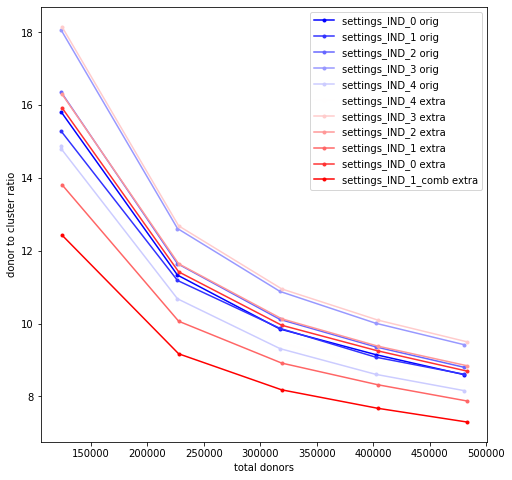

In [102]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [110]:
avg_size_sets = []
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color])

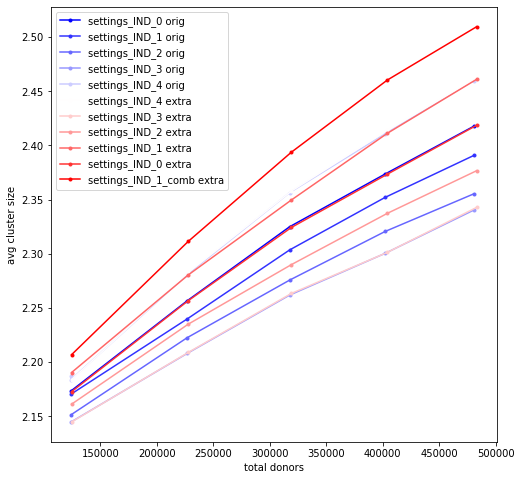

In [111]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [112]:
biggest_size_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], color])

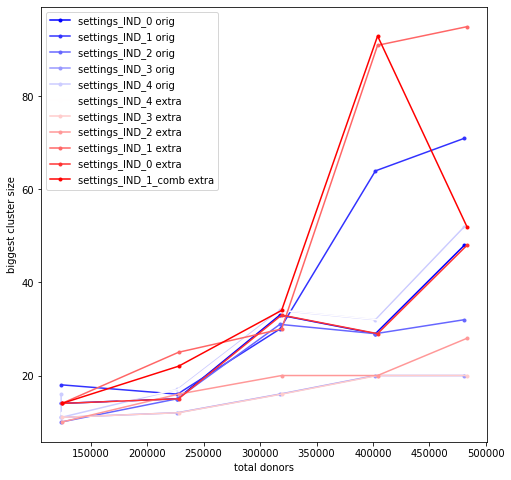

In [113]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [114]:
total_clusters_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[0], color])

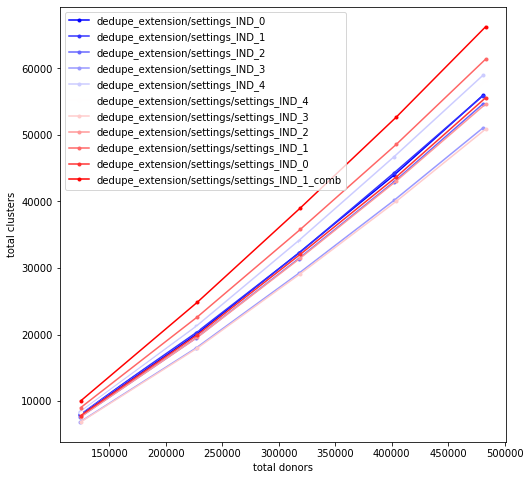

In [115]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()

In [109]:
purple = [cm.Purples(x) for x in [.5,1.0]]
blue = [cm.Blues(x) for x in [.5,.75]]
green = [cm.Greens(x) for x in [.5,.75]]
orange = [cm.Oranges(x) for x in [.5,.75]]
red = [cm.Reds(x) for x in [.5,.75]]

In [79]:
files_grouped = [['dedupe_extension/settings_IND_0','settings_IND_0 orig', purple[0]],
         ['dedupe_extension/settings/settings_IND_0','settings_IND_0 extra 2', purple[1]],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig', blue[0]],
         ['dedupe_extension/settings/settings_IND_1','settings_IND_1 extra 2', blue[1]],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig', green[0]],
         ['dedupe_extension/settings/settings_IND_2','settings_IND_2 extra 2', green[1]],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig', orange[0]],
         ['dedupe_extension/settings/settings_IND_3','settings_IND_3 extra 2', orange[1]],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig', red[0]],
         ['dedupe_extension/settings/settings_IND_4','settings_IND_4 extra 2', red[1]]]

In [80]:
ratio_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color, file[2]])

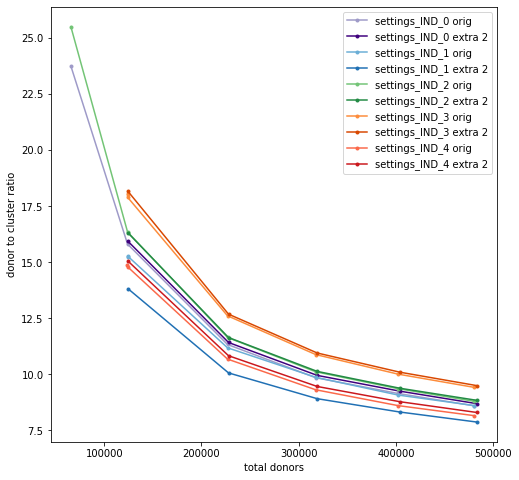

In [81]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [82]:
avg_size_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color,file[2]])

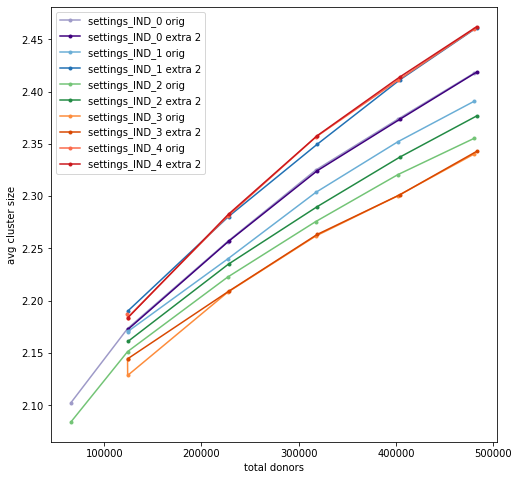

In [83]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [84]:
biggest_size_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], file[2]])

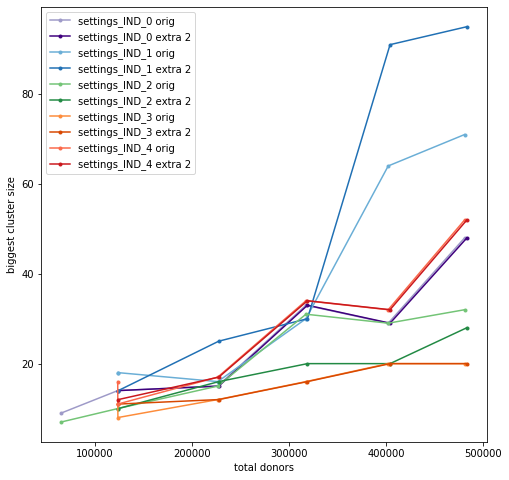

In [85]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [88]:
total_clusters_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[1], file[2]])

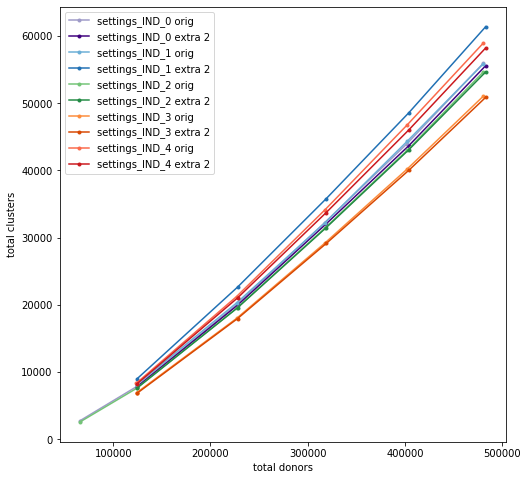

In [89]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()